In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/AB/Downloads/Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [4]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# Exploratory Data Analysis

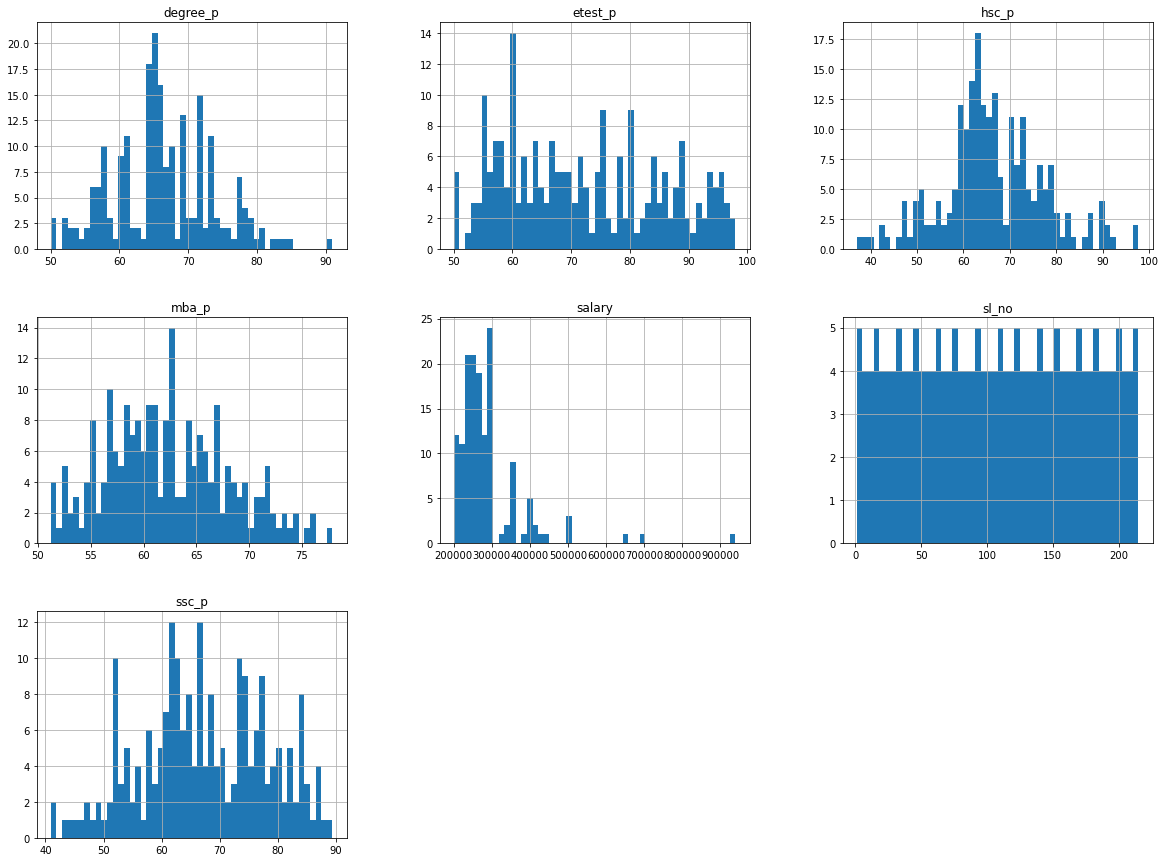

In [5]:
df.hist(bins = 50, figsize=(20,15))
plt.show()

# Which factor influenced a candidate in getting placed?

 - From the initial analysis of the data it is understood that there are more number of candidates with prior work experience in Finance and this could be one of the reasons why its placement success rate is higher. This assumption is also supported by the comparision between work experience and placement status, which tells that ~86% of candidates with prior experience have been placed as compared to ~60% of non-experienced candidates. With this information, it can be concluded that work experience is one of the factors which influence placements from the above data. 
 
 

 - While the numbers shows that more students from Comm&Mgt are being placed but it is important to note that this field of degree has the highest number of students. In perspective, the percentage of students getting placed in Comm&Mgt and Sci&Tech are equal at 70% success rate each. 

In [6]:
#Computing a cross tabulation to examine the placed and not placed percentage
#Crosstab table shows that the percentage of getting placed is higher in Finance than in HR

pd.crosstab(df.specialisation, df.status, margins = True, normalize = True)

status,Not Placed,Placed,All
specialisation,,,
Mkt&Fin,0.116279,0.441860,0.55814
Mkt&HR,0.195349,0.246512,0.44186
All,0.311628,0.688372,1.00000


In [11]:
#Candidates with prior work experience are higher in Finance than in HR. 

pd.crosstab(df.specialisation, df.workex, margins = True, normalize = True)

workex,No,Yes,All
specialisation,,,
Mkt&Fin,0.320930,0.237209,0.55814
Mkt&HR,0.334884,0.106977,0.44186
All,0.655814,0.344186,1.00000


In [8]:
pd.crosstab(df.gender, df.status, margins = True, normalize = True)

status,Not Placed,Placed,All
gender,,,
F,0.130233,0.223256,0.353488
M,0.181395,0.465116,0.646512
All,0.311628,0.688372,1.000000


In [9]:
pd.crosstab(df.workex, df.status, margins = True, normalize = True)

status,Not Placed,Placed,All
workex,,,
No,0.265116,0.390698,0.655814
Yes,0.046512,0.297674,0.344186
All,0.311628,0.688372,1.000000


In [16]:
pd.crosstab(df.degree_t, df.status, margins = True, normalize = True)

status,Not Placed,Placed,All
degree_t,,,
Comm&Mgmt,0.200000,0.474419,0.674419
Others,0.027907,0.023256,0.051163
Sci&Tech,0.083721,0.190698,0.274419
All,0.311628,0.688372,1.000000


In [28]:
pd.crosstab(df.mba_p, df.status, margins = True, normalize = True)

status,Not Placed,Placed,All
mba_p,,,
51.21,0.004651,0.000000,0.004651
51.29,0.004651,0.000000,0.004651
51.45,0.004651,0.000000,0.004651
51.58,0.004651,0.000000,0.004651
52.21,0.004651,0.000000,0.004651
...,...,...,...
75.71,0.004651,0.000000,0.004651
76.18,0.000000,0.004651,0.004651
76.26,0.000000,0.004651,0.004651


# Which degree specialization is much demanded by corporate?

The below plot shows that Finance has greater demand in corporate when compared to HR. 

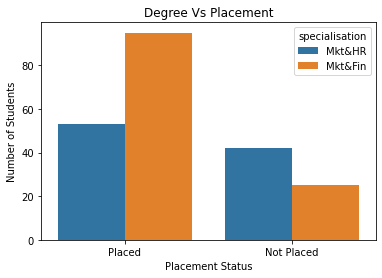

In [22]:
sns.countplot(x = "status", data = df, hue = 'specialisation')
plt.title("Degree Vs Placement")
plt.xlabel("Placement Status")
plt.ylabel("Number of Students")
plt.show()

# Does work experience affects placement of a candidate?

The below plot suggests that there is a relation between work experience and candidate getting a placement. A candidate with prior work experience is more likely to get placed as opposed to candidate without experience. 

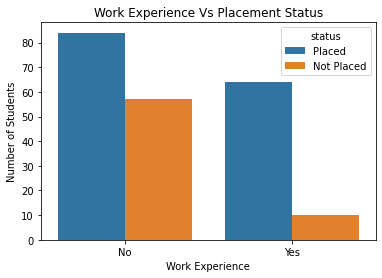

In [23]:
sns.countplot(x = "workex", data = df, hue = "status")
plt.title("Work Experience Vs Placement Status")
plt.xlabel("Work Experience")
plt.ylabel("Number of Students")
plt.show()

# What is the most popular undergraduate degree among corporate for hiring?

While the below plot suggests that Comm&Mgt is more popular in hiring, this is because there are more number of students enrolled for this degree. According to the ratio of students per placment, both Comm&Mgt and Sci&Tech are equally popular in corporate while hiring. 

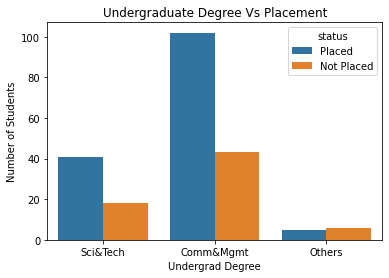

In [24]:
sns.countplot(x = "degree_t", data = df, hue = "status")
plt.title("Undergraduate Degree Vs Placement")
plt.xlabel("Undergrad Degree")
plt.ylabel("Number of Students")
plt.show()

# Correlation between numeric columns

The below correlation matrix shows that there is negative correlation between undergradute percentage and salary. But, there is a positive correlation between MBA percentage and salary. In-turn, there is a positive correlation between undergraduate percentage and MBA percentage. 

In [26]:
numeric_data = df.select_dtypes(exclude=[object])

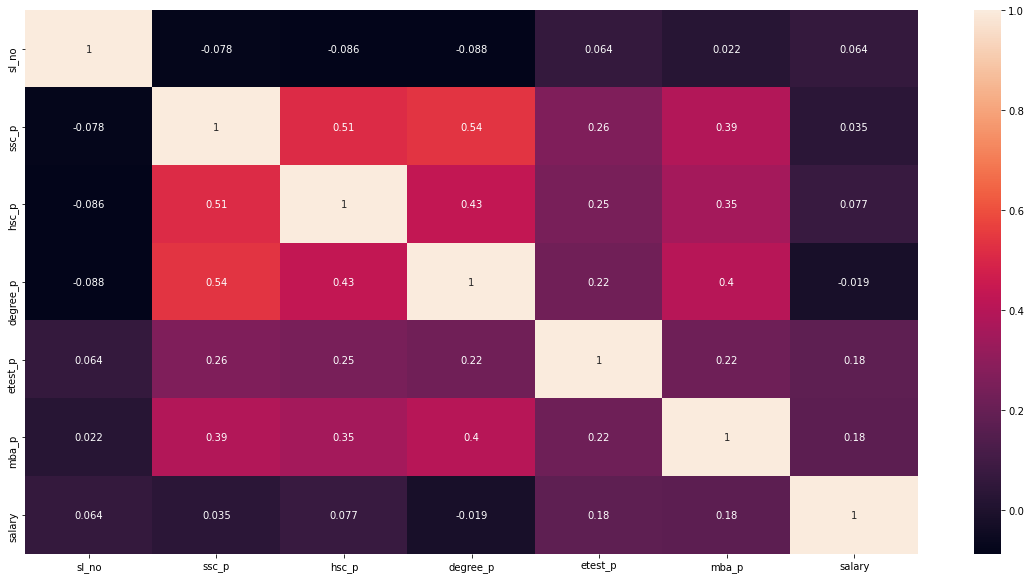

In [27]:
corr_matrix = numeric_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot = True)
plt.show()